In [164]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [165]:
from sklearn import linear_model, metrics

In [166]:
my_data = np.genfromtxt('linreg_data.csv',delimiter=',')

my_data

array([[5.588390e-01, 1.643261e+00],
       [1.135218e+00, 3.298449e+00],
       [1.292233e+00, 4.317444e+00],
       [1.731773e+00, 4.292910e+00],
       [3.768810e-01, 1.234585e+00],
       [1.529740e+00, 4.322690e+00],
       [8.216480e-01, 2.273181e+00],
       [7.402000e-01, 2.392481e+00],
       [1.689147e+00, 4.471996e+00],
       [1.833402e+00, 4.749830e+00],
       [1.118546e+00, 3.307957e+00],
       [9.575790e-01, 3.287438e+00],
       [1.397140e+00, 3.766729e+00],
       [1.571950e-01, 1.356051e+00],
       [5.407200e-02, 9.142180e-01],
       [9.779680e-01, 3.116244e+00],
       [1.991509e+00, 4.798414e+00],
       [1.167114e+00, 3.188243e+00],
       [1.178361e+00, 3.364121e+00],
       [1.364000e-03, 9.848440e-01],
       [6.531680e-01, 2.686284e+00],
       [1.084908e+00, 3.325208e+00],
       [1.371329e+00, 3.701835e+00],
       [1.104000e-01, 7.553270e-01],
       [1.411002e+00, 3.721373e+00],
       [4.492370e-01, 1.667590e+00],
       [1.899989e+00, 5.080494e+00],
 

In [167]:
#Pick data from numpy array

xp = my_data[:,0] # first column becomes x values

yp = my_data[:,1] # second column becomes y values

xp = xp.reshape(-1,1) # sklearn requires this shape below

yp = yp.reshape(-1,1) # -1 means automatic number of rows


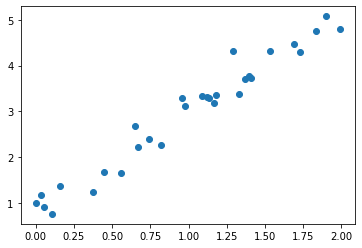

In [168]:
plt.scatter(xp,yp)
plt.show()

# Model Creation and Training

In [169]:
model = linear_model.LinearRegression() # pick regression model

model.fit(xp, yp) # fitting the model=training the model


LinearRegression()

In [170]:
m = model.coef_
m

array([[2.1387759]])

In [171]:
b = model.intercept_
b

array([0.84039871])

In [172]:
#Predict

xval = np.array(0.5).reshape(-1,1)

yval = model.predict(xval) # predict single value

yval



array([[1.90978666]])

In [173]:
m*xval+b # same value

array([[1.90978666]])

In [174]:
values = np.array ([0.7, 0.8,0.9]).reshape(-1,1)
preds = model.predict(values)

preds


array([[2.33754184],
       [2.55141943],
       [2.76529702]])

# Model evaluation

In [175]:
yhat = model.predict(xp)

print('Mean Absolute Error:', metrics.mean_absolute_error(yp, yhat))

print('Mean Squared Error:', metrics.mean_squared_error(yp, yhat))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yp, yhat)))

print('R2 value:', metrics.r2_score(yp, yhat))

Mean Absolute Error: 0.19969075618017434
Mean Squared Error: 0.06587573535539963
Root Mean Squared Error: 0.2566626878909352
R2 value: 0.9588798319617569


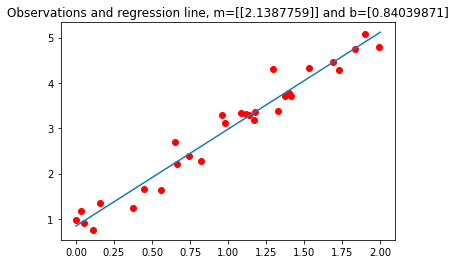

In [176]:
#Plot regression line

xvals = np.linspace(0,2,20).reshape(-1,1)

yvals = model.predict(xvals)

plt.plot(xvals,yvals) # this plots the line

plt.scatter(xp,yp,color="red") # these are the training data points

plt.title('Observations and regression line, m={} and b={}'.format(m,b))

plt.show()

In [177]:
df =  pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [178]:
xp = np.array( df.Height).reshape(-1,1) # first column becomes x values

yp = np.array( df.Weight).reshape(-1,1) # second column becomes y values


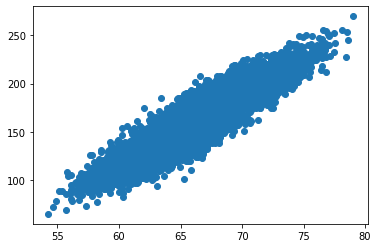

In [179]:
plt.scatter(xp,yp)
plt.show()

In [180]:
model = linear_model.LinearRegression() # pick regression model

model.fit(xp, yp) # fitting the model=training the model


LinearRegression()

In [181]:
m = model.coef_
b = model.intercept_
b

array([-350.73719181])

In [182]:
#Predict

xval = np.array(200/2.54).reshape(-1,1)

yval = model.predict(xval) # predict single value

yval

array([[256.92325234]])

In [183]:
values = np.array ([60, 70,75]).reshape(-1,1)
preds = model.predict(values)

preds

array([[112.30006663],
       [189.47294304],
       [228.05938125]])

In [184]:
yhat = model.predict(xp)

print('Mean Absolute Error:', metrics.mean_absolute_error(yp, yhat))

print('Mean Squared Error:', metrics.mean_squared_error(yp, yhat))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yp, yhat)))

print('R2 value:', metrics.r2_score(yp, yhat))

Mean Absolute Error: 9.746718764605346
Mean Squared Error: 149.2934839491296
Root Mean Squared Error: 12.218571272826035
R2 value: 0.8551742120609958


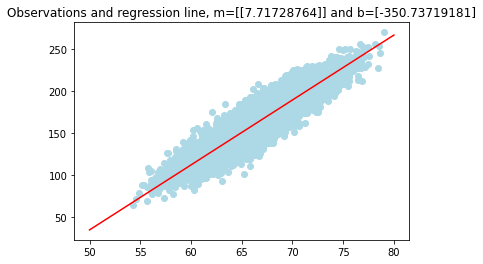

In [216]:
xvals = np.linspace(50,80,2).reshape(-1,1)

yvals = model.predict(xvals)

plt.plot(xvals,yvals,color="red") # this plots the line

plt.scatter(xp,yp,color="lightblue") # these are the training data points

plt.title('Observations and regression line, m={} and b={}'.format(m,b))

plt.show()

# Polinomial Regression 

In [186]:

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

data_pd = pd.read_csv("quadreg_data.csv",names=["x","y"])



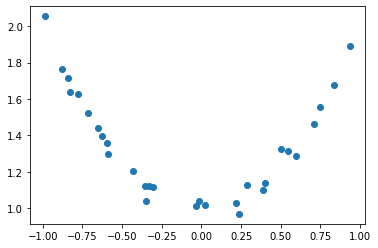

In [187]:
#convert to numpy array

xpd = np.array(data_pd[["x"]]).reshape(-1,1) # pandas' columns to numpy arrays

ypd = np.array(data_pd[["y"]]).reshape(-1,1)


plt.scatter(xpd,ypd)
plt.show()



#Model selection and training


In [189]:

poly_reg = PolynomialFeatures(degree=2) # second order/degree model

X_poly = poly_reg.fit_transform(xpd)

pol_reg = linear_model.LinearRegression()

pol_reg.fit(X_poly, ypd)



LinearRegression()

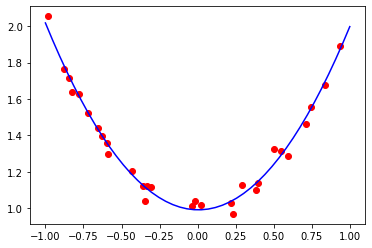

In [213]:
#Predict and plot

plt.scatter(xpd, ypd, color='red')

xvals = np.linspace(-1,1,44).reshape(-1,1)

yvals = pol_reg.predict(poly_reg.fit_transform(xvals))# HOX! fit_transform pitää olla!

plt.plot(xvals, yvals, color='blue')

plt.show()

In [204]:
# Model carries information about fitted parameters

print(pol_reg.coef_)

print("c=",pol_reg.intercept_)



[[ 0.         -0.01009154  1.01581228]]
c= [0.99140532]


In [214]:
#Evaluation

yhat = pol_reg.predict(poly_reg.fit_transform(xpd))# HOX! fit_transform pitää olla!

print('R2 value:', metrics.r2_score(ypd, yhat))

R2 value: 0.9812766862658817


# Dataset splitting

In [220]:
from sklearn.model_selection import train_test_split

In [271]:
df = pd.read_csv('Admission_Predict.csv',delimiter=",")

df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [240]:
#Select variables

X = df[['CGPA']] # input variable, note capital X

y = df[['Chance of Admit ']] # target variable


In [245]:
#Dataset splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train, X_test, y_train, y_test

(     CGPA
 279  8.73
 186  8.68
 41   8.20
 153  8.75
 83   9.36
 ..    ...
 44   9.40
 290  7.65
 258  8.76
 335  9.11
 371  9.22
 
 [320 rows x 1 columns],
      CGPA
 54   8.00
 286  9.19
 233  8.07
 33   9.60
 205  7.65
 ..    ...
 395  9.04
 162  8.50
 185  9.11
 97   8.96
 203  9.87
 
 [80 rows x 1 columns],
      Chance of Admit 
 279              0.67
 186              0.84
 41               0.49
 153              0.79
 83               0.92
 ..                ...
 44               0.91
 290              0.58
 258              0.77
 335              0.83
 371              0.89
 
 [320 rows x 1 columns],
      Chance of Admit 
 54               0.70
 286              0.92
 233              0.64
 33               0.90
 205              0.57
 ..                ...
 395              0.82
 162              0.67
 185              0.89
 97               0.86
 203              0.97
 
 [80 rows x 1 columns])

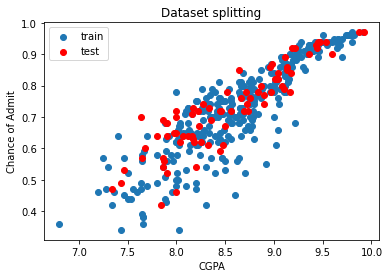

In [246]:
#Visualize train/test split

plt.scatter(X_train,y_train)

plt.scatter(X_test,y_test,color="red")

plt.legend(["train","test"])

plt.xlabel("CGPA")

plt.ylabel("Chance of Admit")

plt.title("Dataset splitting")

plt.show()

In [248]:
#Train and predict

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train) # fit with training data!!!



LinearRegression()

In [255]:
m = lm.coef_
b = lm.intercept_
X_test2 = np.array(X_test).reshape(-1,1)

predictions = lm.predict(X_test2) # predict on test data!!


C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.59182182],
       [0.84658835],
       [0.60680809],
       [0.93436505],
       [0.51689049],
       [0.7780797 ],
       [0.56184929],
       [0.68816211],
       [0.63892152],
       [0.63463973],
       [0.90653342],
       [0.52331318],
       [0.68816211],
       [0.5575675 ],
       [0.64962599],
       [0.61751256],
       [0.84444746],
       [0.62821704],
       [0.56399018],
       [0.6003854 ],
       [0.80162955],
       [0.88298357],
       [0.62607615],
       [0.90225163],
       [0.84016567],
       [0.4697908 ],
       [0.57041287],
       [0.63035794],
       [0.66889405],
       [0.58754003],
       [0.57041287],
       [0.54900392],
       [0.82732029],
       [0.59182182],
       [0.62821704],
       [0.75238896],
       [0.6453442 ],
       [0.47621348],
       [0.73312091],
       [0.8230385 ],
       [0.59182182],
       [0.71171195],
       [0.73954359],
       [0.74596628],
       [0.57041287],
       [0.91937879],
       [0.80805224],
       [0.660

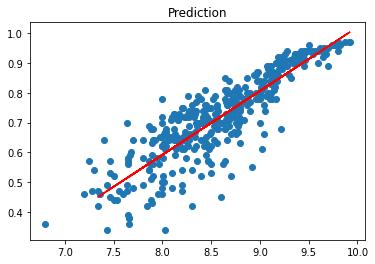

In [256]:
#Plot predictions

plt.scatter(X,y)

plt.plot(X_test2,predictions,color="red")

plt.title("Prediction")

plt.show()

In [259]:
print('R2 value:', metrics.r2_score(y_test,predictions))

R2 value: 0.7696078024537815


In [260]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [261]:

import seaborn as sns

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [272]:
df = pd.read_csv('housing.data.csv',delim_whitespace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Text(0.5, 0, 'MEDV')

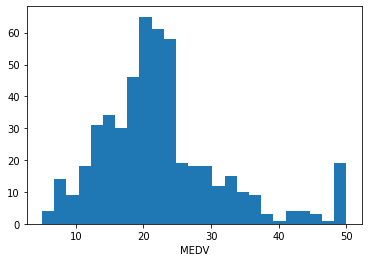

In [273]:
#MEDV histogram

plt.hist(df['MEDV'],25)

plt.xlabel("MEDV")

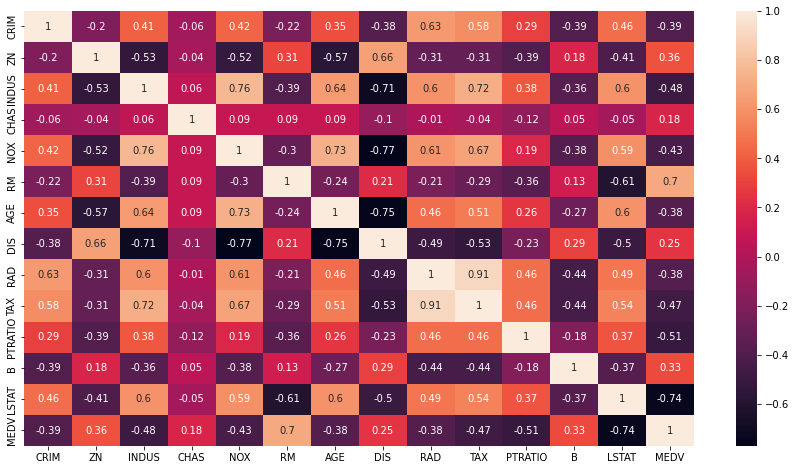

In [274]:
#Correlation

plt.figure(figsize = (15,8)) # set figure size for heatmap

sns.heatmap(data=df.corr().round(2), annot=True)

plt.show()

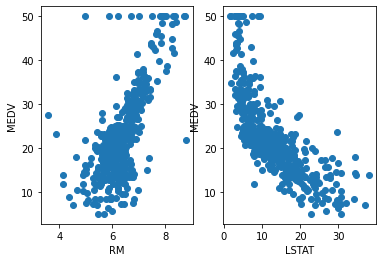

In [275]:
#Plot explanatory variables against target

# target = MEDV

# explanatory = RM, LSTAT

plt.subplot(1,2,1)

plt.scatter(df['RM'],df['MEDV'])

plt.xlabel("RM")

plt.ylabel("MEDV")

plt.subplot(1,2,2)

plt.scatter(df['LSTAT'],df['MEDV'])

plt.xlabel("LSTAT")

plt.ylabel("MEDV")

plt.show()



In [287]:
#Pick variables and split

X =df[['LSTAT','RM']]

y = df[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=5)
y_train

,MEDV
33,13.1
283,50.0
418,8.8
502,20.6
402,12.1
...,...
486,19.1
189,34.9
495,23.1
206,24.4


In [288]:
#Model training

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [309]:
xvals= np.array([5.07, 6.1221]).reshape(1,2)
lm.predict(xvals)

C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.99890635]])

In [293]:
#Evaluate on test data and training data separately

y_train_predict = lm.predict(X_train)# evalution on train data

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

r2 = r2_score(y_train, y_train_predict)





y_test_predict = lm.predict(X_test)# evaluate on test data

rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

r2_test = r2_score(y_test, y_test_predict)

In [295]:
print(rmse,r2)
print(rmse_test,r2_test)

5.6371293350711955 0.6300745149331701
5.137400784702912 0.6628996975186952


# Exercice 2

In [300]:
df = pd.read_csv('winequality-white.csv',delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


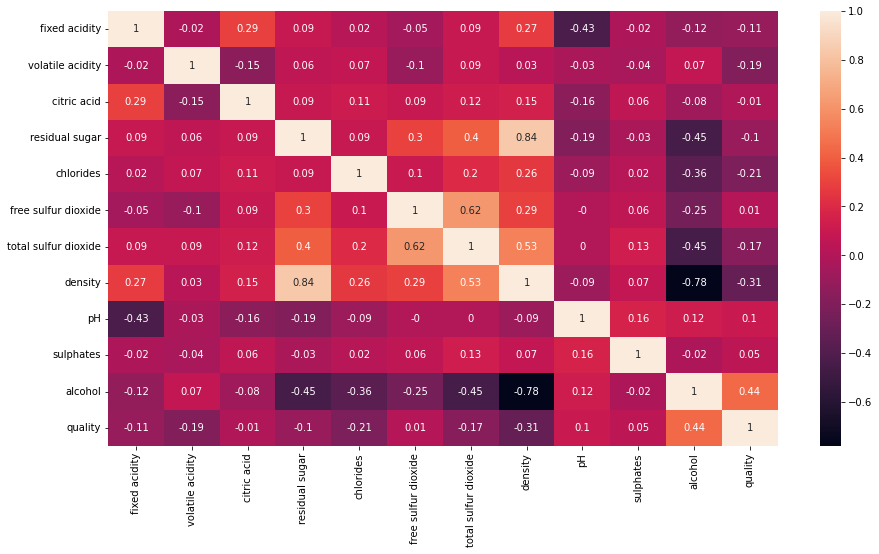

In [301]:
plt.figure(figsize = (15,8)) # set figure size for heatmap

sns.heatmap(data=df.corr().round(2), annot=True)

plt.show()

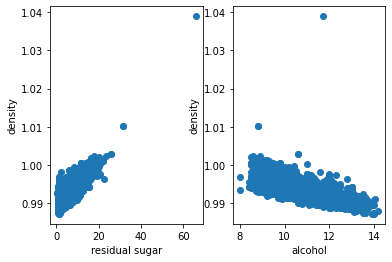

In [305]:

plt.subplot(1,2,1)

plt.scatter(df['residual sugar'],df['density'])

plt.xlabel("residual sugar")

plt.ylabel("density")

plt.subplot(1,2,2)

plt.scatter(df['alcohol'],df['density'])

plt.xlabel("alcohol")

plt.ylabel("density")

plt.show()

In [307]:

X =df[['residual sugar','alcohol']]

y = df[['density']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=5)

ml = LinearRegression()

ml.fit(X_train, y_train)


y_train_predict = ml.predict(X_train)# evalution on train data

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

r2 = r2_score(y_train, y_train_predict)





y_test_predict = ml.predict(X_test)# evaluate on test data

rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

r2_test = r2_score(y_test, y_test_predict)

In [308]:
print(rmse,r2)
print(rmse_test,r2_test)

0.0009291535616123144 0.9030508801350408
0.0008476353353989418 0.9210196485975157


In [322]:
xvals= np.array([40, 7]).reshape(1,2)
ml.predict(xvals)

C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.01048122]])

# Execice

In [352]:
df = pd.read_csv('50_startups.csv',delimiter=',')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


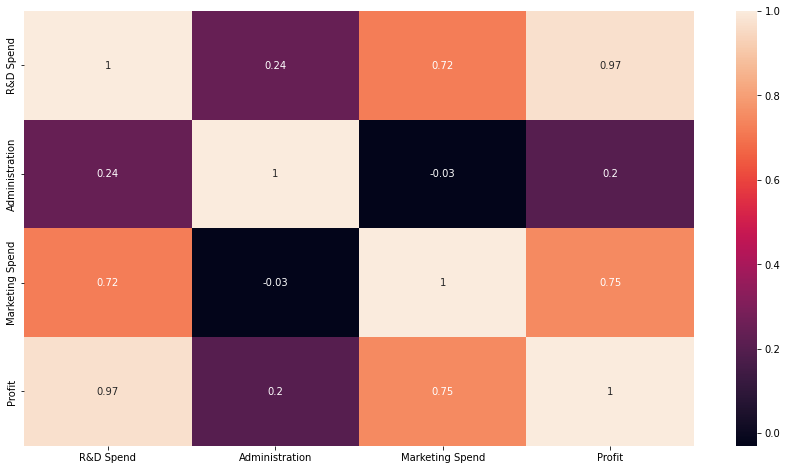

In [353]:
plt.figure(figsize = (15,8)) # set figure size for heatmap

sns.heatmap(data=df.corr().round(2), annot=True)

plt.show()

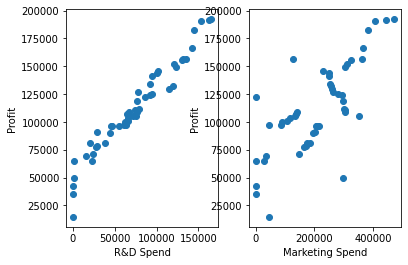

In [354]:
plt.subplot(1,2,1)

plt.scatter(df['R&D Spend'],df['Profit'])

plt.xlabel("R&D Spend")

plt.ylabel("Profit")

plt.subplot(1,2,2)

plt.scatter(df['Marketing Spend'],df['Profit'])

plt.xlabel("Marketing Spend")

plt.ylabel("Profit")

plt.show()

In [355]:

X =df[['R&D Spend','Marketing Spend']]

y = df[['Profit']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=5)

ml = LinearRegression()

ml.fit(X_train, y_train)


y_train_predict = ml.predict(X_train)# evalution on train data

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

r2 = r2_score(y_train, y_train_predict)





y_test_predict = ml.predict(X_test)# evaluate on test data

rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

r2_test = r2_score(y_test, y_test_predict)
print(rmse,r2)
print(rmse_test,r2_test)

9358.583115148496 0.9436198878593198
7073.857168705303 0.9683604384024198


In [357]:
xvals= np.array([[1000000, 4000],[4000, 1000000],[0, 0]]).reshape(3,2)
ml.predict(xvals)

C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[816104.23831108],
       [ 88399.93051138],
       [ 46417.14445842]])